Fashion MNIST is a drop-in replacement for the very well known, machine learning hello world, MNIST dataset. It has same number of training and test examples and the images have the same 28x28 size and there are a total of 10 classes/labels, you can read more about the dataset here : [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)


In this post we will be trying out a couple of different models to and compare their results:

## List of models

1. 2 Layer Neural Netwoek
2. CNN with 1 Convolutional Layer
3. CNN with 3 Convolutional Layers
4. VGG Like Model
5. VGG Like Model With Batchnorm


## Approach

I split the original training data into 80% training and 20% validation. This helps to see weather we're overfitting on the training data and weather we should lower the learning rate and train for more epochs if validation accuarcy is higher than training accuarcy or stop overtraining if training accuarcy shift higher than the validation.

To be consistend here, all the models are initially trained for 10 epochs and another 10 epochs with a lower learning late. After the initial 20 epochs, I added data augmentation, which generates new training samples by rotating, shifting and zooming on the training samples, and trained for another 50 epochs.

Also, to avoid hot encoding the labels, I decided to use `sparse_categorical_crossentropy` when compiling the models.

## Observations
All the models achieved a higher accuracy after using data augmentation. Almost always use data augmentation !!


## Fun Fact

If you uncomment the code in **Drop-in Replacement you said?** section, you'll be able to run all the models on MNIST instead of Fashion-MNIST.
It is much easier to get +99.5% results on MNIST. However, as you can see by running the models on both datasets, it gets relatively harder to squeeze accuary on the Fashion-MNIST dataset. 




# Required Libaries

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
np.random.seed(12345)
%matplotlib inline

Using TensorFlow backend.


# Download and Load Fashion-MNIST

In [2]:
batch_size = 512

In [3]:
train_images_path = keras.utils.get_file('train-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-images-idx3-ubyte.gz')
train_labels_path = keras.utils.get_file('train-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/train-labels-idx1-ubyte.gz')
test_images_path = keras.utils.get_file('t10k-images-idx3-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-images-idx3-ubyte.gz')
test_labels_path = keras.utils.get_file('t10k-labels-idx1-ubyte.gz', 'https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/data/fashion/t10k-labels-idx1-ubyte.gz')

In [4]:
def load_mnist(images_path, labels_path):
    import os
    import gzip
    import numpy as np

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels


In [5]:
X_train_orig, y_train_orig = load_mnist(train_images_path, train_labels_path)
X_test, y_test = load_mnist(test_images_path, test_labels_path)
X_train_orig = X_train_orig.astype('float32')
X_test = X_test.astype('float32')
X_train_orig /= 255
X_test /= 255

## Drop-in Replacement you said?
As I said at the beginning, fashion MNIST is drop-in replacement for MNINT. In case you want to run all these models on MNIST and compare the results. Uncomment the next section and everything should work automatically.

In [6]:
# from keras.datasets import mnist
# (X_train_orig, y_train_orig), (X_test, y_test) = mnist.load_data()
# X_train_orig = X_train_orig.reshape(60000, 784)
# X_test = X_test.reshape(10000, 784)
# X_train_orig = X_train_orig.astype('float32')
# X_test = X_test.astype('float32')
# X_train_orig /= 255
# X_test /= 255

In [7]:
print(X_train_orig.shape)
print(y_train_orig.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=12345)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


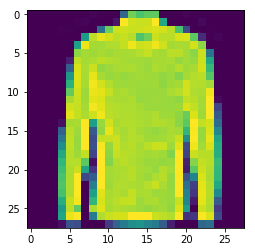

In [10]:
plt.imshow(X_train[1, :].reshape((28, 28)))

# 2 Layer Neural Network

In [11]:
model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation='softmax')
])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s - loss: 0.6354 - acc: 0.7800 - val_loss: 0.4209 - val_acc: 0.8569
Epoch 2/20
48000/48000 [==============================] - 0s - loss: 0.4120 - acc: 0.8564 - val_loss: 0.3947 - val_acc: 0.8657
Epoch 3/20
48000/48000 [==============================] - 0s - loss: 0.3717 - acc: 0.8675 - val_loss: 0.3657 - val_acc: 0.8750
Epoch 4/20
48000/48000 [==============================] - 0s - loss: 0.3400 - acc: 0.8776 - val_loss: 0.3263 - val_acc: 0.8866
Epoch 5/20
48000/48000 [==============================] - 0s - loss: 0.3181 - acc: 0.8855 - val_loss: 0.3122 - val_acc: 0.8871
Epoch 6/20
48000/48000 [==============================] - 0s - loss: 0.2965 - acc: 0.8933 - val_loss: 0.3192 - val_acc: 0.8876
Epoch 7/20
48000/48000 [==============================] - 0s - loss: 0.2855 - acc: 0.8953 - val_loss: 0.3082 - val_acc: 0.8907
Epoch 8/20
48000/48000 [==============================] - 0s 

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.357285452712
Test accuracy: 0.8879


# CNN with 1 Convolutional Layer

In [16]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [17]:
cnn1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [18]:
cnn1.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [19]:
cnn1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s - loss: 0.6535 - acc: 0.7764 - val_loss: 0.4212 - val_acc: 0.8563
Epoch 2/10
48000/48000 [==============================] - 0s - loss: 0.4004 - acc: 0.8595 - val_loss: 0.3474 - val_acc: 0.8813
Epoch 3/10
48000/48000 [==============================] - 0s - loss: 0.3477 - acc: 0.8769 - val_loss: 0.3211 - val_acc: 0.8893
Epoch 4/10
48000/48000 [==============================] - 0s - loss: 0.3228 - acc: 0.8848 - val_loss: 0.2988 - val_acc: 0.8969
Epoch 5/10
48000/48000 [==============================] - 0s - loss: 0.2998 - acc: 0.8940 - val_loss: 0.2789 - val_acc: 0.9033
Epoch 6/10
48000/48000 [==============================] - 0s - loss: 0.2865 - acc: 0.8975 - val_loss: 0.2782 - val_acc: 0.9018
Epoch 7/10
48000/48000 [==============================] - 0s - loss: 0.2721 - acc: 0.9030 - val_loss: 0.2709 - val_acc: 0.9053
Epoch 8/10
48000/48000 [==============================] - 0s 

In [20]:
cnn1.optimizer.lr = 0.0001

In [21]:
cnn1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 0s - loss: 0.2361 - acc: 0.9138 - val_loss: 0.2467 - val_acc: 0.9130
Epoch 2/10
48000/48000 [==============================] - 0s - loss: 0.2254 - acc: 0.9188 - val_loss: 0.2436 - val_acc: 0.9139
Epoch 3/10
48000/48000 [==============================] - 0s - loss: 0.2203 - acc: 0.9195 - val_loss: 0.2362 - val_acc: 0.9177
Epoch 4/10
48000/48000 [==============================] - 0s - loss: 0.2104 - acc: 0.9228 - val_loss: 0.2366 - val_acc: 0.9167
Epoch 5/10
48000/48000 [==============================] - 0s - loss: 0.2070 - acc: 0.9238 - val_loss: 0.2276 - val_acc: 0.9187
Epoch 6/10
48000/48000 [==============================] - 0s - loss: 0.1971 - acc: 0.9278 - val_loss: 0.2254 - val_acc: 0.9229
Epoch 7/10
48000/48000 [==============================] - 0s - loss: 0.1913 - acc: 0.9301 - val_loss: 0.2348 - val_acc: 0.9149
Epoch 8/10
48000/48000 [==============================] - 0s 

In [22]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.250880071822
Test accuracy: 0.9123


### Data Augmentation

In [23]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_val, y_val, batch_size=batch_size)

In [24]:
cnn1.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=True)

Epoch 1/50
93/93 [==============================] - 7s - loss: 0.5429 - acc: 0.7988 - val_loss: 0.4489 - val_acc: 0.8303
Epoch 2/50
93/93 [==============================] - 6s - loss: 0.4493 - acc: 0.8327 - val_loss: 0.4163 - val_acc: 0.8443
Epoch 3/50
93/93 [==============================] - 6s - loss: 0.4383 - acc: 0.8365 - val_loss: 0.3987 - val_acc: 0.8533
Epoch 4/50
93/93 [==============================] - 6s - loss: 0.4167 - acc: 0.8440 - val_loss: 0.3855 - val_acc: 0.8594
Epoch 5/50
93/93 [==============================] - 6s - loss: 0.4039 - acc: 0.8486 - val_loss: 0.3835 - val_acc: 0.8585
Epoch 6/50
93/93 [==============================] - 6s - loss: 0.4013 - acc: 0.8498 - val_loss: 0.3762 - val_acc: 0.8633
Epoch 7/50
93/93 [==============================] - 6s - loss: 0.3855 - acc: 0.8555 - val_loss: 0.3643 - val_acc: 0.8633
Epoch 8/50
93/93 [==============================] - 6s - loss: 0.3817 - acc: 0.8575 - val_loss: 0.3545 - val_acc: 0.8700
Epoch 9/50
93/93 [==============

In [25]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.23108966648
Test accuracy: 0.9153


# CNN with 3 Convolutional Layers

In [26]:
cnn2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [27]:
cnn2.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [28]:
cnn2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s - loss: 0.9809 - acc: 0.6365 - val_loss: 0.5820 - val_acc: 0.7757
Epoch 2/10
48000/48000 [==============================] - 1s - loss: 0.5837 - acc: 0.7796 - val_loss: 0.4740 - val_acc: 0.8273
Epoch 3/10
48000/48000 [==============================] - 1s - loss: 0.4999 - acc: 0.8146 - val_loss: 0.4217 - val_acc: 0.8484
Epoch 4/10
48000/48000 [==============================] - 1s - loss: 0.4506 - acc: 0.8331 - val_loss: 0.3986 - val_acc: 0.8590
Epoch 5/10
48000/48000 [==============================] - 1s - loss: 0.4136 - acc: 0.8469 - val_loss: 0.3570 - val_acc: 0.8728
Epoch 6/10
48000/48000 [==============================] - 1s - loss: 0.3802 - acc: 0.8588 - val_loss: 0.3243 - val_acc: 0.8816
Epoch 7/10
48000/48000 [==============================] - 1s - loss: 0.3668 - acc: 0.8646 - val_loss: 0.3143 - val_acc: 0.8849
Epoch 8/10
48000/48000 [==============================] - 1s 

In [29]:
cnn2.optimizer.lr = 0.0001

In [30]:
cnn2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s - loss: 0.3096 - acc: 0.8857 - val_loss: 0.2743 - val_acc: 0.9002
Epoch 2/10
48000/48000 [==============================] - 1s - loss: 0.2982 - acc: 0.8890 - val_loss: 0.2716 - val_acc: 0.8997
Epoch 3/10
48000/48000 [==============================] - 1s - loss: 0.2944 - acc: 0.8909 - val_loss: 0.2588 - val_acc: 0.9082
Epoch 4/10
48000/48000 [==============================] - 1s - loss: 0.2877 - acc: 0.8941 - val_loss: 0.2554 - val_acc: 0.9077
Epoch 5/10
48000/48000 [==============================] - 1s - loss: 0.2768 - acc: 0.8965 - val_loss: 0.2491 - val_acc: 0.9096
Epoch 6/10
48000/48000 [==============================] - 1s - loss: 0.2711 - acc: 0.8995 - val_loss: 0.2455 - val_acc: 0.9097
Epoch 7/10
48000/48000 [==============================] - 1s - loss: 0.2644 - acc: 0.9017 - val_loss: 0.2513 - val_acc: 0.9086
Epoch 8/10
48000/48000 [==============================] - 1s 

In [31]:
score = cnn2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.257787227988
Test accuracy: 0.9062


### Data Augmentation

In [32]:
cnn2.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=True)

Epoch 1/50
93/93 [==============================] - 7s - loss: 0.4677 - acc: 0.8254 - val_loss: 0.3842 - val_acc: 0.8568
Epoch 2/50
93/93 [==============================] - 6s - loss: 0.4257 - acc: 0.8413 - val_loss: 0.3541 - val_acc: 0.8660
Epoch 3/50
93/93 [==============================] - 6s - loss: 0.4153 - acc: 0.8453 - val_loss: 0.3463 - val_acc: 0.8733
Epoch 4/50
93/93 [==============================] - 6s - loss: 0.3991 - acc: 0.8506 - val_loss: 0.3464 - val_acc: 0.8717
Epoch 5/50
93/93 [==============================] - 6s - loss: 0.3878 - acc: 0.8551 - val_loss: 0.3366 - val_acc: 0.8730
Epoch 6/50
93/93 [==============================] - 6s - loss: 0.3780 - acc: 0.8588 - val_loss: 0.3250 - val_acc: 0.8806
Epoch 7/50
93/93 [==============================] - 6s - loss: 0.3791 - acc: 0.8592 - val_loss: 0.3206 - val_acc: 0.8789
Epoch 8/50
93/93 [==============================] - 6s - loss: 0.3718 - acc: 0.8615 - val_loss: 0.3215 - val_acc: 0.8813
Epoch 9/50
93/93 [==============

In [33]:
score = cnn2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.239840124524
Test accuracy: 0.9095


# CNN with 4 Convolutional Layers and Batch Normalization

In [34]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
def norm_input(x): return (x-mean_px)/std_px

In [35]:
cnn3 = Sequential([
    Lambda(norm_input, input_shape=(28,28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),    
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [36]:
cnn3.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [37]:
cnn3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s - loss: 0.7104 - acc: 0.7530 - val_loss: 1.9009 - val_acc: 0.5357
Epoch 2/10
48000/48000 [==============================] - 5s - loss: 0.4277 - acc: 0.8448 - val_loss: 1.8746 - val_acc: 0.5033
Epoch 3/10
48000/48000 [==============================] - 5s - loss: 0.3553 - acc: 0.8730 - val_loss: 1.6118 - val_acc: 0.5543
Epoch 4/10
48000/48000 [==============================] - 5s - loss: 0.3102 - acc: 0.8877 - val_loss: 0.8439 - val_acc: 0.7046
Epoch 5/10
48000/48000 [==============================] - 5s - loss: 0.2814 - acc: 0.8984 - val_loss: 0.4175 - val_acc: 0.8534
Epoch 6/10
48000/48000 [==============================] - 5s - loss: 0.2582 - acc: 0.9079 - val_loss: 0.2650 - val_acc: 0.9050
Epoch 7/10
48000/48000 [==============================] - 5s - loss: 0.2423 - acc: 0.9142 - val_loss: 0.2335 - val_acc: 0.9178
Epoch 8/10
48000/48000 [==============================] - 5s 

In [38]:
cnn3.optimizer.lr = 0.0001

In [39]:
cnn3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s - loss: 0.1881 - acc: 0.9314 - val_loss: 0.2101 - val_acc: 0.9270
Epoch 2/10
48000/48000 [==============================] - 5s - loss: 0.1753 - acc: 0.9362 - val_loss: 0.1913 - val_acc: 0.9338
Epoch 3/10
48000/48000 [==============================] - 5s - loss: 0.1707 - acc: 0.9380 - val_loss: 0.2064 - val_acc: 0.9291
Epoch 4/10
48000/48000 [==============================] - 5s - loss: 0.1570 - acc: 0.9438 - val_loss: 0.1977 - val_acc: 0.9312
Epoch 5/10
48000/48000 [==============================] - 5s - loss: 0.1567 - acc: 0.9428 - val_loss: 0.1824 - val_acc: 0.9376
Epoch 6/10
48000/48000 [==============================] - 5s - loss: 0.1420 - acc: 0.9480 - val_loss: 0.1919 - val_acc: 0.9358
Epoch 7/10
48000/48000 [==============================] - 5s - loss: 0.1342 - acc: 0.9506 - val_loss: 0.1856 - val_acc: 0.9373
Epoch 8/10
48000/48000 [==============================] - 5s 

In [40]:
score = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.239513599713
Test accuracy: 0.9267


### Data Augmentation

In [41]:
cnn3.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=True)

Epoch 1/50
93/93 [==============================] - 7s - loss: 0.4569 - acc: 0.8427 - val_loss: 0.3263 - val_acc: 0.8827
Epoch 2/50
93/93 [==============================] - 6s - loss: 0.3597 - acc: 0.8688 - val_loss: 0.3222 - val_acc: 0.8842
Epoch 3/50
93/93 [==============================] - 6s - loss: 0.3402 - acc: 0.8768 - val_loss: 0.2789 - val_acc: 0.8995
Epoch 4/50
93/93 [==============================] - 6s - loss: 0.3233 - acc: 0.8829 - val_loss: 0.2744 - val_acc: 0.9009
Epoch 5/50
93/93 [==============================] - 6s - loss: 0.3090 - acc: 0.8894 - val_loss: 0.2834 - val_acc: 0.8992
Epoch 6/50
93/93 [==============================] - 6s - loss: 0.3091 - acc: 0.8880 - val_loss: 0.2749 - val_acc: 0.8991
Epoch 7/50
93/93 [==============================] - 6s - loss: 0.3000 - acc: 0.8918 - val_loss: 0.2589 - val_acc: 0.9056
Epoch 8/50
93/93 [==============================] - 6s - loss: 0.2883 - acc: 0.8963 - val_loss: 0.2549 - val_acc: 0.9079
Epoch 9/50
93/93 [==============

In [42]:
score = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.188260396481
Test accuracy: 0.9354


# VGG Like Model

In [43]:
cnn4 = Sequential([
    Lambda(norm_input, input_shape=(28,28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),    
    MaxPooling2D(pool_size=(2, 2)),
    
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),    
    MaxPooling2D(pool_size=(2, 2)),
    
    
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [44]:
cnn4.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [45]:
cnn4.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s - loss: 1.1620 - acc: 0.5509 - val_loss: 0.5807 - val_acc: 0.7721
Epoch 2/10
48000/48000 [==============================] - 3s - loss: 0.5223 - acc: 0.8059 - val_loss: 0.4136 - val_acc: 0.8458
Epoch 3/10
48000/48000 [==============================] - 3s - loss: 0.3864 - acc: 0.8613 - val_loss: 0.2957 - val_acc: 0.8952
Epoch 4/10
48000/48000 [==============================] - 3s - loss: 0.3172 - acc: 0.8871 - val_loss: 0.3052 - val_acc: 0.8885
Epoch 5/10
48000/48000 [==============================] - 3s - loss: 0.2787 - acc: 0.9008 - val_loss: 0.2342 - val_acc: 0.9158
Epoch 6/10
48000/48000 [==============================] - 3s - loss: 0.2430 - acc: 0.9131 - val_loss: 0.2404 - val_acc: 0.9127
Epoch 7/10
48000/48000 [==============================] - 3s - loss: 0.2172 - acc: 0.9227 - val_loss: 0.2469 - val_acc: 0.9091
Epoch 8/10
48000/48000 [==============================] - 3s 

In [46]:
cnn4.optimizer.lr = 0.0001

In [47]:
cnn4.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s - loss: 0.1584 - acc: 0.9442 - val_loss: 0.2155 - val_acc: 0.9267
Epoch 2/10
48000/48000 [==============================] - 3s - loss: 0.1319 - acc: 0.9526 - val_loss: 0.2024 - val_acc: 0.9305
Epoch 3/10
48000/48000 [==============================] - 3s - loss: 0.1228 - acc: 0.9567 - val_loss: 0.2117 - val_acc: 0.9301
Epoch 4/10
48000/48000 [==============================] - 3s - loss: 0.1096 - acc: 0.9611 - val_loss: 0.2452 - val_acc: 0.9255
Epoch 5/10
48000/48000 [==============================] - 3s - loss: 0.0986 - acc: 0.9651 - val_loss: 0.2530 - val_acc: 0.9255
Epoch 6/10
48000/48000 [==============================] - 3s - loss: 0.0896 - acc: 0.9675 - val_loss: 0.2428 - val_acc: 0.9273
Epoch 7/10
48000/48000 [==============================] - 3s - loss: 0.0835 - acc: 0.9711 - val_loss: 0.2585 - val_acc: 0.9183
Epoch 8/10
48000/48000 [==============================] - 3s 

In [48]:
score = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.334026500632
Test accuracy: 0.9208


### Data Augmentation

In [49]:
cnn4.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=True)

Epoch 1/50
93/93 [==============================] - 7s - loss: 0.3967 - acc: 0.8585 - val_loss: 0.3305 - val_acc: 0.8817
Epoch 2/50
93/93 [==============================] - 6s - loss: 0.3177 - acc: 0.8850 - val_loss: 0.2868 - val_acc: 0.8943
Epoch 3/50
93/93 [==============================] - 6s - loss: 0.2959 - acc: 0.8916 - val_loss: 0.2782 - val_acc: 0.8997
Epoch 4/50
93/93 [==============================] - 6s - loss: 0.2750 - acc: 0.8993 - val_loss: 0.2831 - val_acc: 0.8998
Epoch 5/50
93/93 [==============================] - 6s - loss: 0.2683 - acc: 0.9019 - val_loss: 0.2666 - val_acc: 0.9006
Epoch 6/50
93/93 [==============================] - 6s - loss: 0.2647 - acc: 0.9048 - val_loss: 0.2718 - val_acc: 0.9016
Epoch 7/50
93/93 [==============================] - 6s - loss: 0.2559 - acc: 0.9077 - val_loss: 0.2533 - val_acc: 0.9083
Epoch 8/50
93/93 [==============================] - 6s - loss: 0.2460 - acc: 0.9118 - val_loss: 0.2505 - val_acc: 0.9098
Epoch 9/50
93/93 [==============

In [50]:
score = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.193522232082
Test accuracy: 0.9359


# VGG Like Model With Batchnorm

In [51]:
cnn5 = Sequential([
    Lambda(norm_input, input_shape=(28,28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),    
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),    
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [52]:
cnn5.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [53]:
cnn5.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 17s - loss: 0.8053 - acc: 0.7310 - val_loss: 2.8340 - val_acc: 0.1061
Epoch 2/10
48000/48000 [==============================] - 16s - loss: 0.4330 - acc: 0.8426 - val_loss: 3.4900 - val_acc: 0.3552
Epoch 3/10
48000/48000 [==============================] - 16s - loss: 0.3449 - acc: 0.8752 - val_loss: 4.8988 - val_acc: 0.1126
Epoch 4/10
48000/48000 [==============================] - 16s - loss: 0.2972 - acc: 0.8927 - val_loss: 2.3724 - val_acc: 0.4153
Epoch 5/10
48000/48000 [==============================] - 16s - loss: 0.2636 - acc: 0.9033 - val_loss: 0.3967 - val_acc: 0.8660
Epoch 6/10
48000/48000 [==============================] - 16s - loss: 0.2409 - acc: 0.9116 - val_loss: 0.4278 - val_acc: 0.8573
Epoch 7/10
48000/48000 [==============================] - 16s - loss: 0.2278 - acc: 0.9169 - val_loss: 0.2007 - val_acc: 0.9286
Epoch 8/10
48000/48000 [==============================

In [54]:
cnn5.optimizer.lr = 0.0001

In [55]:
cnn5.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 16s - loss: 0.1748 - acc: 0.9360 - val_loss: 0.1984 - val_acc: 0.9331
Epoch 2/10
48000/48000 [==============================] - 16s - loss: 0.1652 - acc: 0.9395 - val_loss: 0.1965 - val_acc: 0.9376
Epoch 3/10
48000/48000 [==============================] - 16s - loss: 0.1572 - acc: 0.9425 - val_loss: 0.1781 - val_acc: 0.9401
Epoch 4/10
48000/48000 [==============================] - 16s - loss: 0.1454 - acc: 0.9464 - val_loss: 0.1759 - val_acc: 0.9392
Epoch 5/10
48000/48000 [==============================] - 16s - loss: 0.1350 - acc: 0.9499 - val_loss: 0.2181 - val_acc: 0.9338
Epoch 6/10
48000/48000 [==============================] - 16s - loss: 0.1277 - acc: 0.9527 - val_loss: 0.1997 - val_acc: 0.9358
Epoch 7/10
48000/48000 [==============================] - 16s - loss: 0.1226 - acc: 0.9551 - val_loss: 0.1930 - val_acc: 0.9394
Epoch 8/10
48000/48000 [==============================

In [56]:
score = cnn5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.227945802512
Test accuracy: 0.9296


### Data Augmentaion

In [57]:
cnn5.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=True)

Epoch 1/50
93/93 [==============================] - 16s - loss: 0.3573 - acc: 0.8742 - val_loss: 0.3032 - val_acc: 0.8989
Epoch 2/50
93/93 [==============================] - 16s - loss: 0.2950 - acc: 0.8938 - val_loss: 0.2749 - val_acc: 0.9000
Epoch 3/50
93/93 [==============================] - 16s - loss: 0.2756 - acc: 0.8995 - val_loss: 0.3022 - val_acc: 0.8914
Epoch 4/50
93/93 [==============================] - 16s - loss: 0.2672 - acc: 0.9036 - val_loss: 0.2442 - val_acc: 0.9126
Epoch 5/50
93/93 [==============================] - 16s - loss: 0.2559 - acc: 0.9067 - val_loss: 0.2618 - val_acc: 0.9051
Epoch 6/50
93/93 [==============================] - 16s - loss: 0.2493 - acc: 0.9094 - val_loss: 0.2671 - val_acc: 0.9079
Epoch 7/50
93/93 [==============================] - 16s - loss: 0.2421 - acc: 0.9113 - val_loss: 0.2532 - val_acc: 0.9067
Epoch 8/50
93/93 [==============================] - 16s - loss: 0.2375 - acc: 0.9128 - val_loss: 0.2315 - val_acc: 0.9194
Epoch 9/50
93/93 [======

In [58]:
score = cnn5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.177969511382
Test accuracy: 0.9401
